In [1]:
#Dependencies and setup

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
#Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
#Read the city data csv
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
#Read teh ride data csv
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#GEt the columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#Get the unique calues of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#Get the total of each city type
sum(city_data_df['type'] == 'Urban')


66

In [10]:
sum(city_data_df['type'] == 'Suburban')

36

In [11]:
sum(city_data_df['type'] == 'Rural')

18

In [12]:
#Get the columns and the rowas that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
#Get the types for each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on=["city","city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [16]:
#Create the urban dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
#Create Suburban and Rural dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [18]:
#get the number of rides in the urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
#get suburban and rural ride counts
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
#get average fare in the urban cities
urban_average_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_average_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [21]:
#get average fare for suburban and rural cities
suburban_average_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_average_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
#get average number of drivers in urban cities
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [23]:
#get average number of drivers in suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

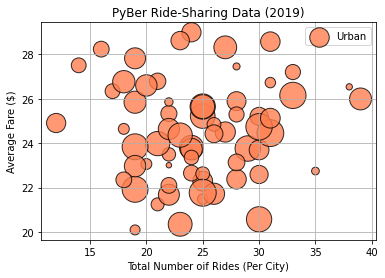

In [30]:
#build the urban scatter plot
plt.scatter(urban_ride_count, urban_average_fare, 
            s=10*urban_driver_count,
            c = 'coral',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number oif Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

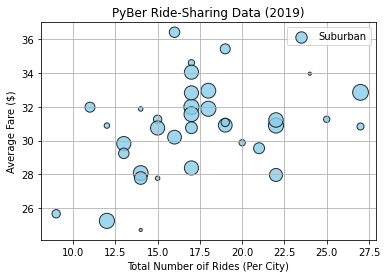

In [33]:
#build the suburban scatter plot
plt.scatter(suburban_ride_count, suburban_average_fare, 
            s=10*suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number oif Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

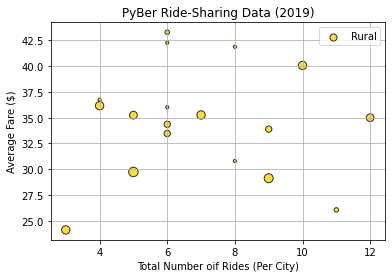

In [34]:
#build the rural scatter plot
plt.scatter(rural_ride_count, rural_average_fare, 
            s=10 * rural_driver_count,
            c = 'gold',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number oif Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

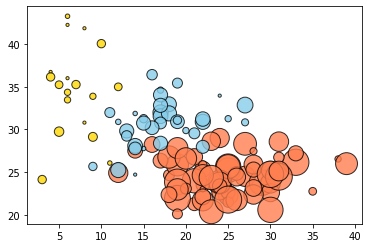

In [35]:
#plot all the scatters
plt.scatter(urban_ride_count, urban_average_fare, 
            s=10*urban_driver_count,
            c = 'coral',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Urban')
plt.scatter(suburban_ride_count, suburban_average_fare, 
            s=10*suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Suburban')
plt.scatter(rural_ride_count, rural_average_fare, 
            s=10 * rural_driver_count,
            c = 'gold',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Rural')
plt.show()

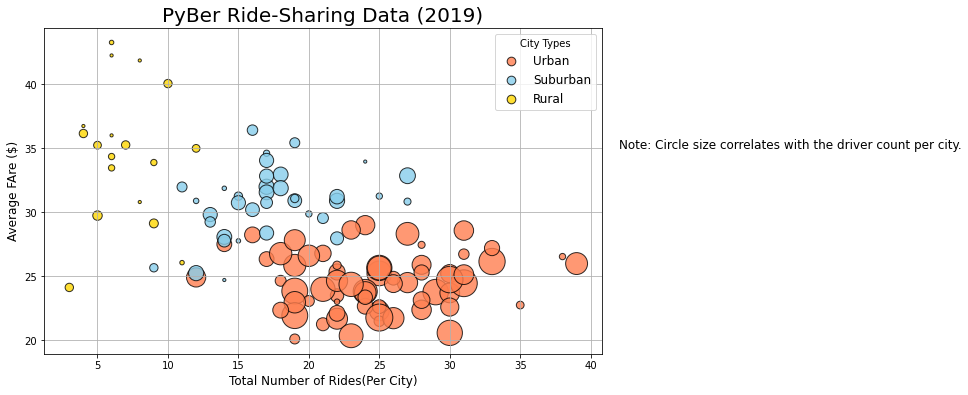

<Figure size 432x288 with 0 Axes>

In [45]:
#plot all the scatters
plt.subplots(figsize = (10,6))
plt.scatter(urban_ride_count, urban_average_fare, 
            s=10*urban_driver_count,
            c = 'coral',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Urban')
plt.scatter(suburban_ride_count, suburban_average_fare, 
            s=10*suburban_driver_count,
            c = 'skyblue',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Suburban')
plt.scatter(rural_ride_count, rural_average_fare, 
            s=10 * rural_driver_count,
            c = 'gold',
            edgecolor = 'black', linewidth = 1,
            alpha = 0.8,
            label = 'Rural')

#chart properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average FAre ($)", fontsize = 12)
plt.xlabel("Total Number of Rides(Per City)", fontsize = 12)
plt.grid(True)

#Create the legend
lgnd = plt.legend(fontsize = '12', mode = 'Expanded', 
                 scatterpoints = 1, loc = 'best', title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

#Add a text label
plt.text(42,35, "Note: Circle size correlates with the driver count per city.", fontsize = 12)
plt.show()

#Save it
plt.savefig("analysis/Fig1.png")